## Analyzing Students Performance
The following code will analyze the students' performance based on the given data



#### 1) Problem Statement 
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection
Dataset Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

#### 3) Importing Data & Required Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 3.1 Load Dataset

In [2]:
# load dataset
df = pd.read_csv("data/studs_perfms.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3.2 Dataset Shape

In [3]:
df.shape

(1000, 8)

#### 4) Data Preprocessing

##### 4.1 Data informations
- Dataset contains 8 columns and 1000 rows
- Column types: object, int64
- Numerical columns count : 3 
- Categorical Column count : 5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 4.2 Column Rename

In [5]:
df.columns = [col.lower().replace(" ", "_").replace("/", "_") for col in df.columns]
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


##### 4.3 Checking Depulicates

In [6]:
df.duplicated().sum()

np.int64(0)

##### 4.4 Check Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### 4.5 No. Of Unique Values

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 4.6 Check the Statistics  

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### 4.7 Seperating Columns by Numericals & Categorical

In [10]:
cat_coln = [col for col in df.columns if df[col].dtypes==object]
print("We have {} Categorical Columns : {} ".format(len(cat_coln), cat_coln))

num_coln = [col for col in df.columns if df[col].dtypes!=object]
print("We have {} Numerical Columns : {} ".format(len(num_coln), num_coln))

We have 5 Categorical Columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 
We have 3 Numerical Columns : ['math_score', 'reading_score', 'writing_score'] 


##### 4.8 Adding a Total & Average Score Column

In [11]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 5) Data Analysis and Visualization

##### 5.1 How many students have get full scores all subject?

In [12]:
no_students_full_score = len(df[df['total_score']==300])
print(f"Number of students with full score: {no_students_full_score}")

Number of students with full score: 3


##### 5.2 How many students passed and failed on each subjects (pass above 20)?

In [13]:
print("Number of students passed or failed according to total score")
no_students_pass = len(df[df['total_score']>=60])
print(f"Number of students with passed: {no_students_pass}")

no_students_fail = len(df[df['total_score']<60])
print(f"Number of students with failed: {no_students_fail}")
print()

print("Number of students passed or failed according to each subject")
no_pass_math = len(df[df['math_score']>=20])
print(f"Number of students with passed in math: {no_pass_math}")

no_pass_reading = len(df[df['reading_score']>=20])
print(f"Number of students with passed in reading: {no_pass_reading}")

no_pass_writing = len(df[df['writing_score']>=20])
print(f"Number of students with passed in writing: {no_pass_writing}")

no_fail_math = len(df[df['math_score']<20])
print(f"Number of students with failed in math: {no_fail_math}")

no_fail_reading = len(df[df['reading_score']<20])
print(f"Number of students with failed in reading: {no_fail_reading}")

no_fail_writing = len(df[df['writing_score']<20])
print(f"Number of students with failed in writing: {no_fail_writing}")


Number of students passed or failed according to total score
Number of students with passed: 998
Number of students with failed: 2

Number of students passed or failed according to each subject
Number of students with passed in math: 996
Number of students with passed in reading: 999
Number of students with passed in writing: 997
Number of students with failed in math: 4
Number of students with failed in reading: 1
Number of students with failed in writing: 3


##### 5.3 Visualize average score distribution to make some conclusion.
- Histogram
- Kernal Distribution Function(KDF)

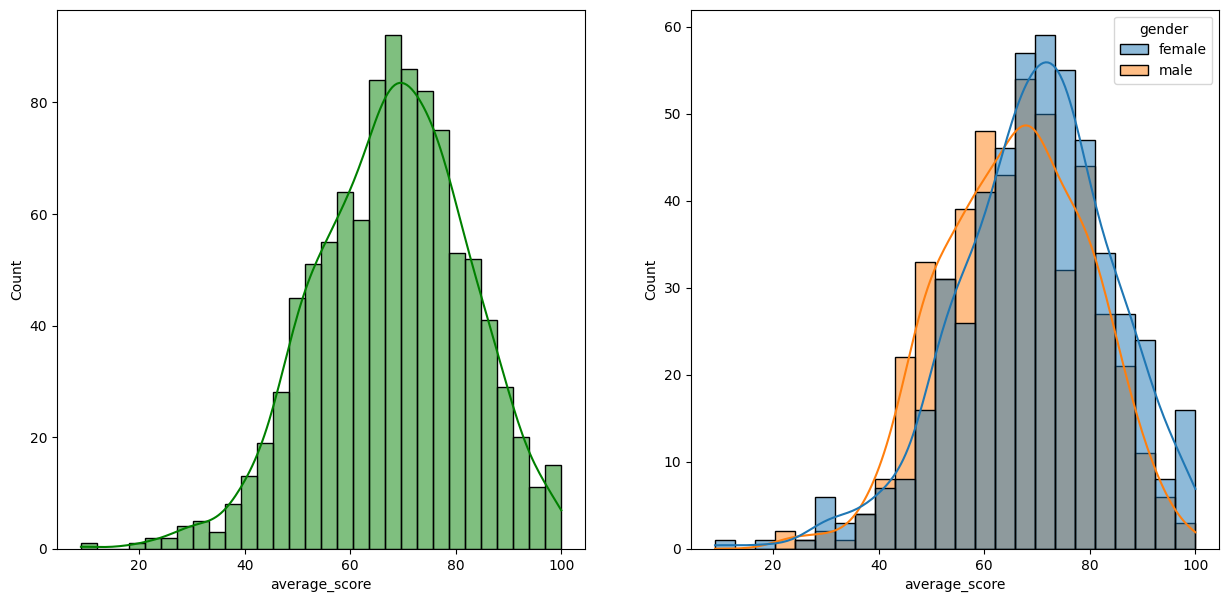

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121) # 1 row, 2 columns, subplot 1.
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122) # 1 row, 2 columns, subplot 2.
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

Insights
- Female students tend to perform well then male students.

##### 5.4 Visualize the average score based on the type of lunch the students have received.


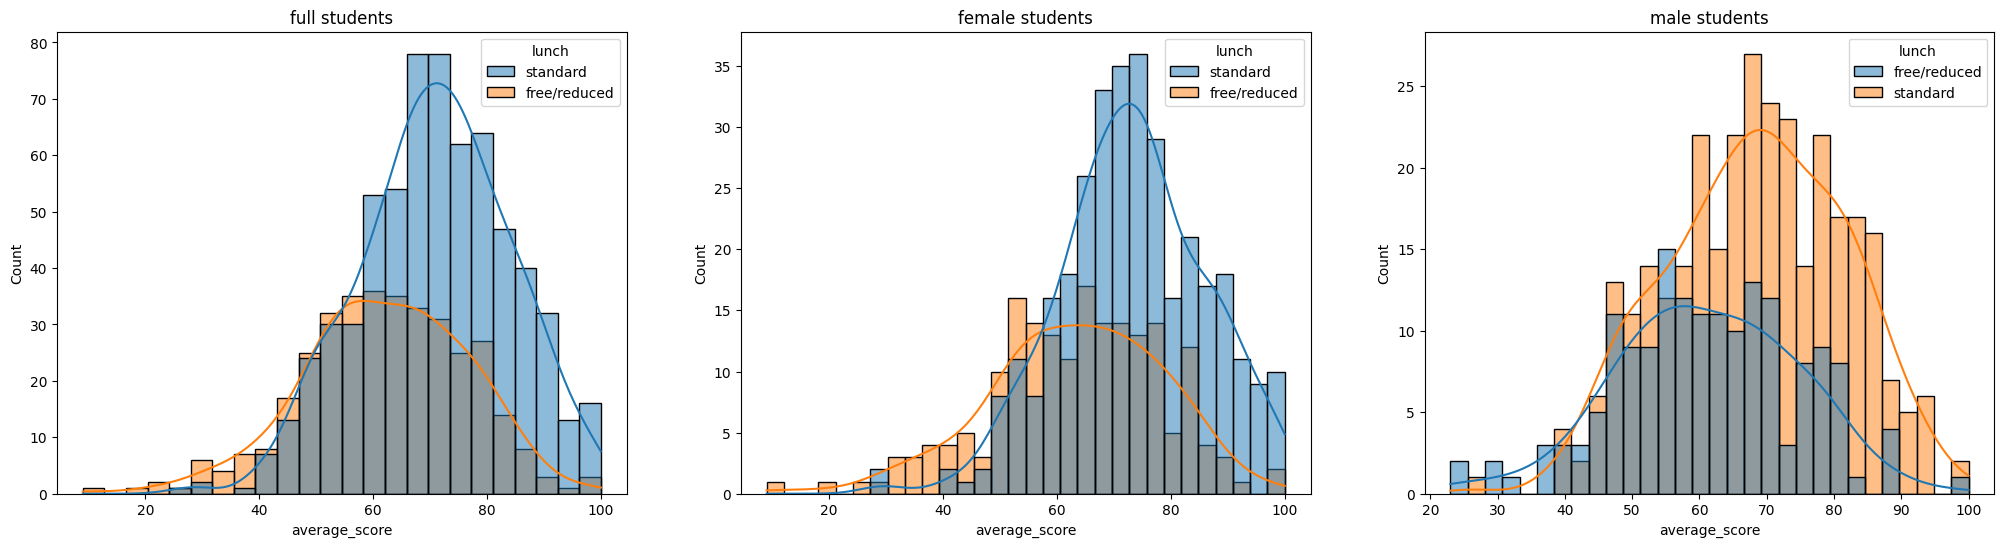

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title("full students")
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
plt.title("female students")
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch',bins=30)
plt.subplot(133)
plt.title("male students")
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch',bins=30)
plt.show()

insights
- Students who receive reduced lunch have lower average score compared to students who receive standard lunch

##### 5.5 Using violinplot for visualize the students average score in each subject

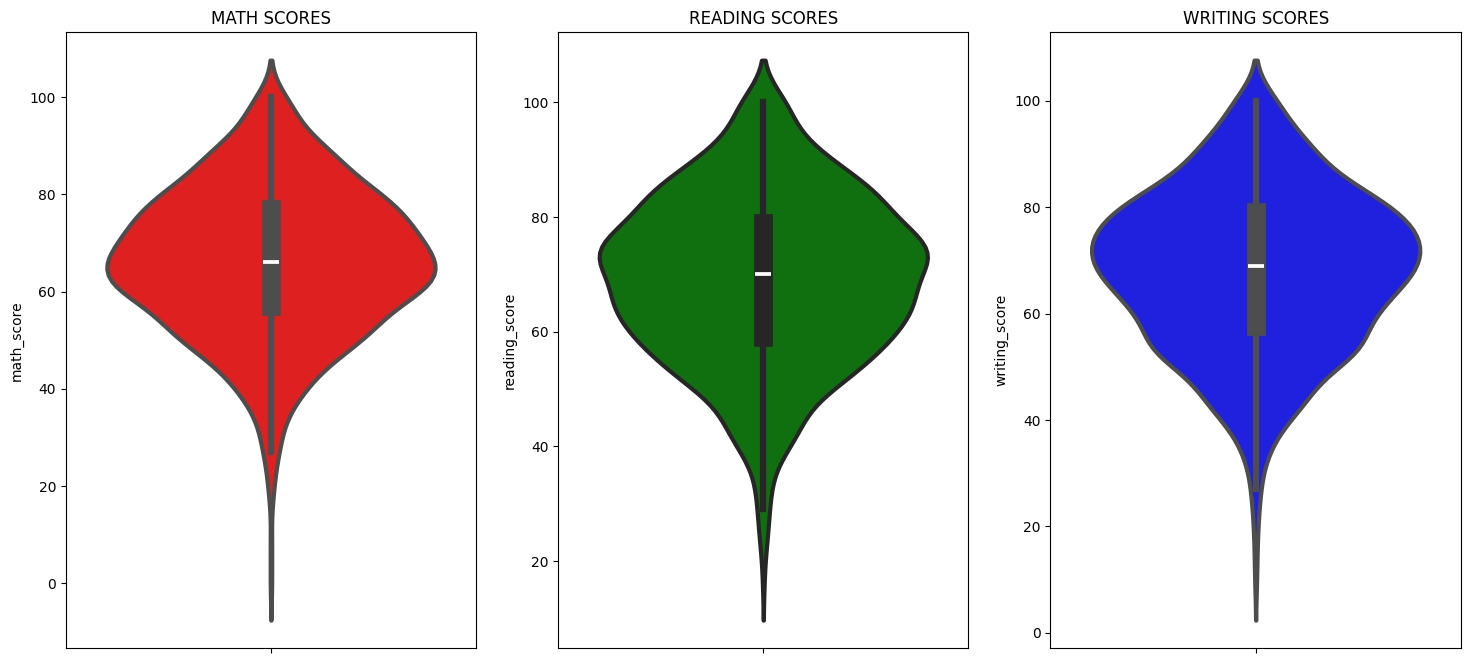

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 5.6 Multivariate analysis
Visualize the variations in students count across different categories such as : gender, lunch, parental education level, preparation test, race and ethnicity

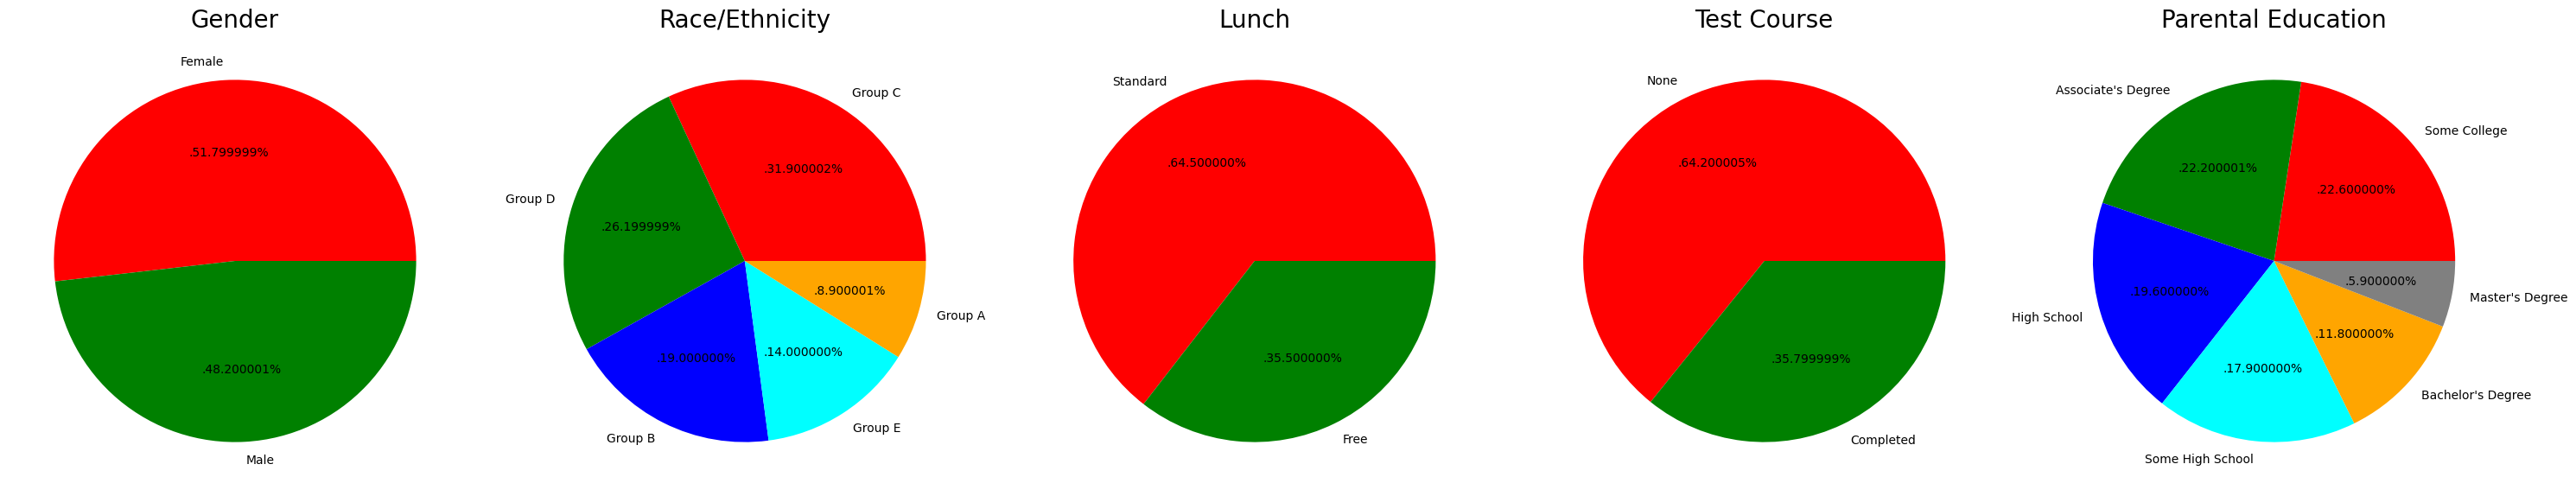

In [17]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insight 
- Gender-wise comparison: The number of female students is slightly higher than that of male students.
- Race/Ethnicity-wise comparison: Group C has the highest number of students, while Group A has the lowest.
- Lunch type comparison: The majority of students receive standard lunch, which is significantly more than those on free/reduced lunch.
- Test preparation course: More students have not completed the test preparation course compared to those who have.
- Parental level of education: The number of students whose parents have an associate degree is slightly higher than other education levels.

C:\Users\kmnik\AppData\Local\Temp\ipykernel_15904\827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\kmnik\AppData\Local\Temp\ipykernel_15904\827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\kmnik\AppData\Local\Temp\ipykernel_15904\827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

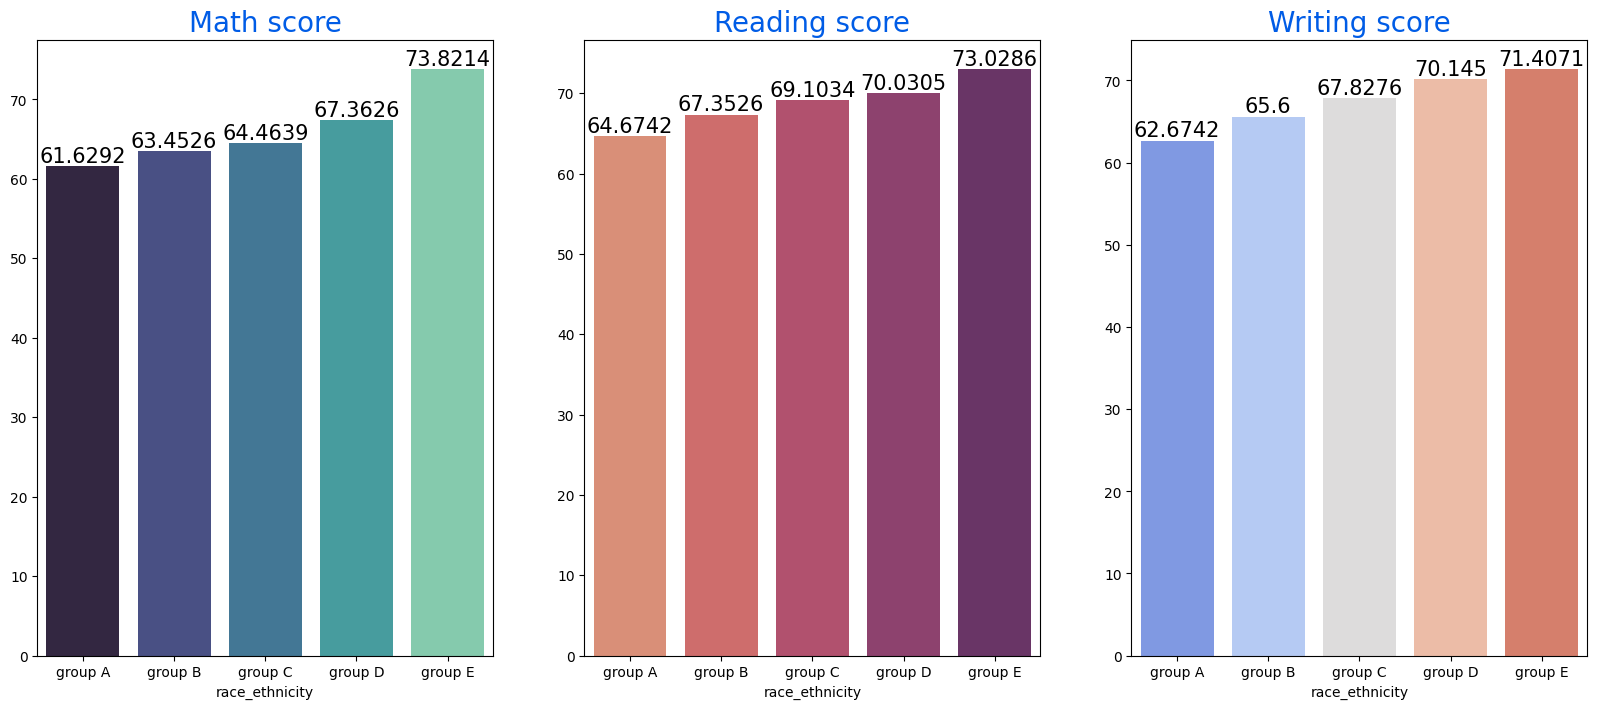

In [18]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.

##### 5.8 CHECKING OUTLIERS

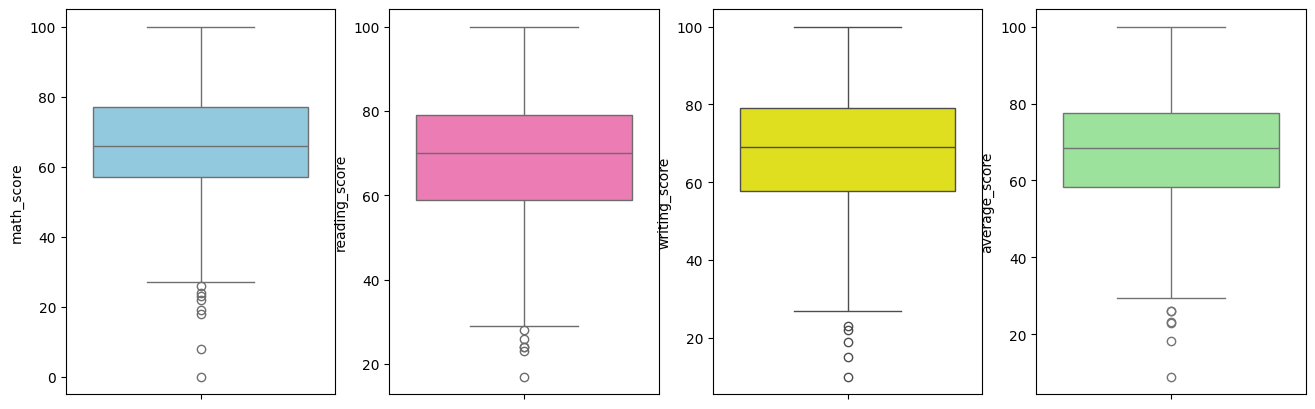

In [20]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()


##### 5.9 MUTIVARIATE ANALYSIS USING PAIRPLOT


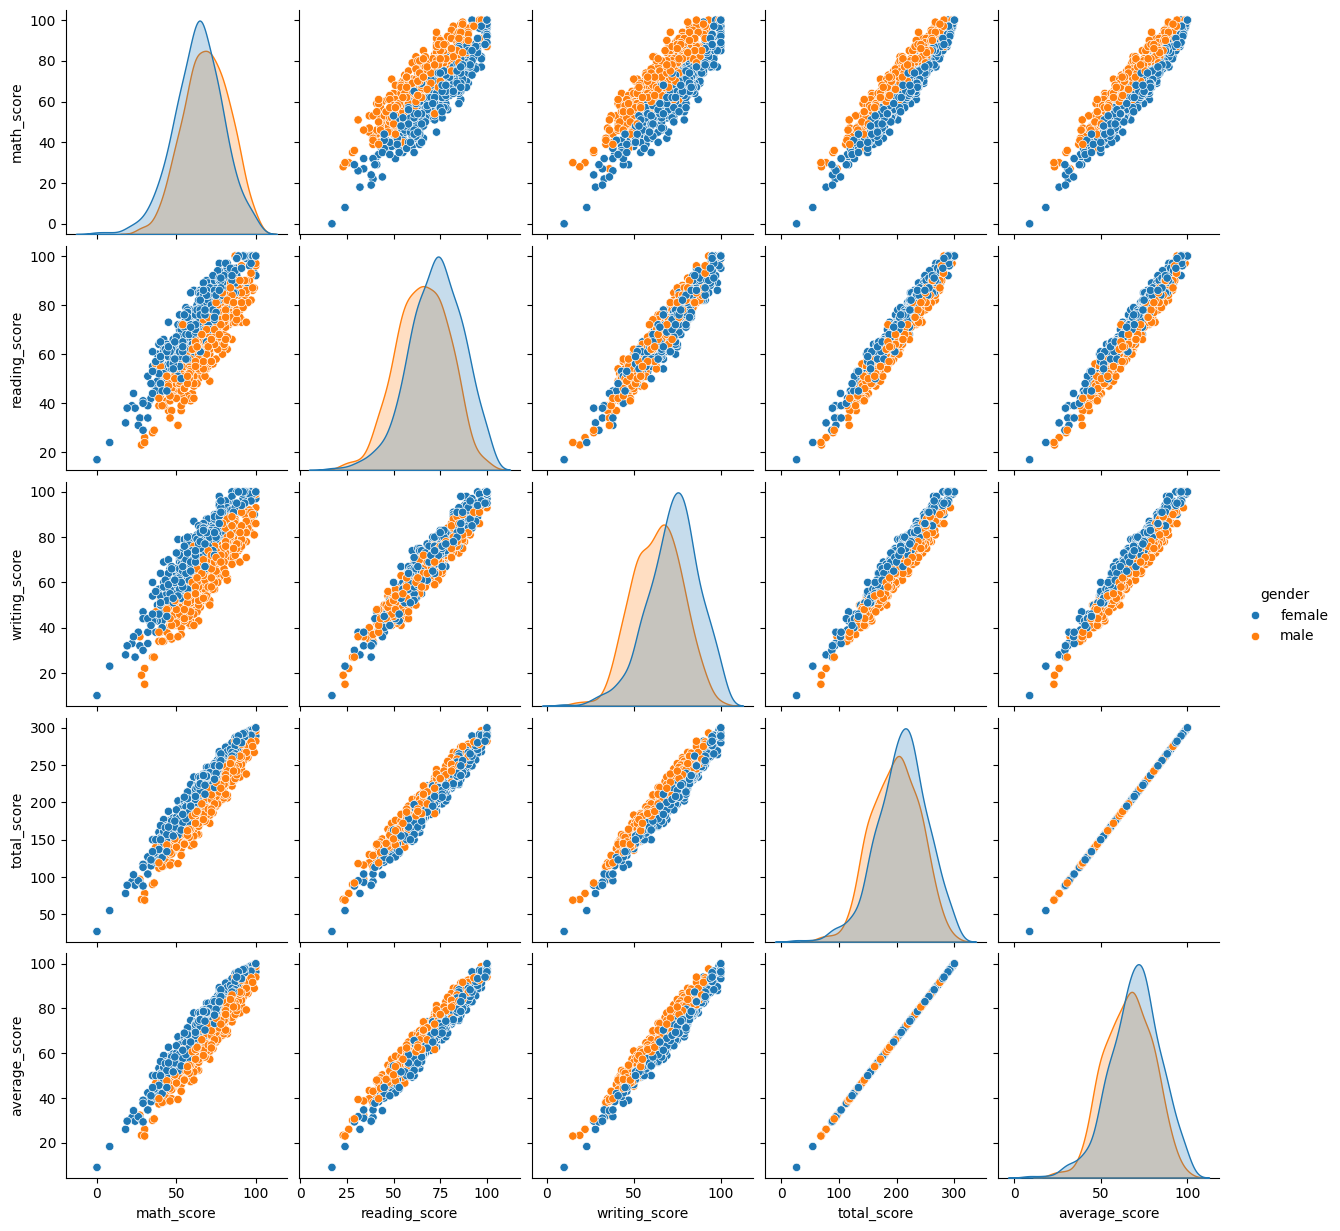

In [21]:
sns.pairplot(df,hue = 'gender')
plt.show()


Insights
- From the above plot it is clear that all the scores increase linearly with each other.


#### 6) Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.